In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:/Users/ASUS/Desktop/set/train-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.describe(include='number')

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,6019,6019,6019,6019,6019,6017,5983,5983,824
unique,1876,11,5,2,4,442,146,372,540
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,49,790,3205,4299,4929,172,606,235,6


****************

**VERİLERİN HAZIRLANMASI**

In [8]:
df.isna().sum() #df.isna().sum() ifadesi, bir DataFrame'deki her bir sütunda eksik değerlerin sayısını döndürür. Bu, veri setindeki her bir sütunda kaç tane 
                # eksik değer olduğunu görmemize yardımcı olur.

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [9]:
df.drop(columns = ['Unnamed: 0','New_Price'],inplace = True)

In [10]:
df.duplicated().sum()
# df[df.duplicated(keep=False)] df.duplicated().sum() ifadesi, 
# bir DataFrame'deki tekrarlanan satırların sayısını döndürür. 
# Bu ifade, DataFrame'deki her bir satırın, önceki satırlarla aynı olup olmadığını kontrol eder 
# ve tekrarlanan satırların sayısını toplar.

0

In [11]:
df['Mileage'] = df['Mileage'].str.split(expand=True)[0].astype(float)
df['Engine'] = df['Engine'].str.split(expand=True)[0].astype(float)

In [12]:
df['Power'] = df['Power'].replace('null bhp',None)
print('The number of data appearing as "null nhp":', (df['Power'] == 'null bhp').sum())
df['Power'] = df['Power'].str.split(expand=True)[0].astype(float)

The number of data appearing as "null nhp": 0


In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [14]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [15]:
df['Mileage'].fillna(df['Mileage'].mean(), inplace=True)
df['Engine'].fillna(df['Engine'].mean(), inplace=True)
df['Power'].fillna(df['Power'].mean(), inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)

In [16]:
df.isna().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

******************

**AYKIRI DEĞERLERİ BULMAK**

In [17]:
df.shape

(6019, 12)

In [18]:
# Calculating Z-Score
z_scores = stats.zscore(df["Kilometers_Driven"])

# Identifying outliers using Z-Score
threshold = 2.5 # Usually 2.5 or 3 can be chosen
outliers = df['Kilometers_Driven'][abs(z_scores) > threshold]

outliers

340      775000
358      620000
1528     299322
1860     720000
2328    6500000
2823     480000
3092     480000
3649     300000
4491     445000
Name: Kilometers_Driven, dtype: int64

In [19]:
df = df[df["Kilometers_Driven"] <= 300000]

In [20]:
df["Seats"].min()

0.0

In [21]:
df = df[df['Seats'] != 0]

******************************

**Düzenleme Özellikleri**

In [22]:
df['Name'].nunique()

1874

In [23]:
df.sample()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1634,Maruti Ciaz VXi Plus,Kochi,2015,46601,Petrol,Manual,First,20.73,1373.0,91.1,5.0,6.84


In [24]:
df['Company'] = df['Name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['Name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['Name'],inplace = True)

In [25]:
df['Company'].nunique() , df['Model'].nunique()

(30, 215)

In [26]:
new_order = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission',
             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
df = df.reindex(columns=new_order)

**************************


**Keşif Amaçlı Veri Analizi**

In [27]:
df.sample()

,Company,Model,Location,Owner_Type,Fuel_Type,Transmission,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
476,hyundai,hyundai grand,Delhi,First,Petrol,Manual,2015,27000,18.9,1197.0,82.0,5.0,4.5


***************************************

**Kategorik Değişkenler için Tek Değişkenli Analiz**

*"Company"*

In [28]:
df.Company.value_counts()

Company
maruti           1211
hyundai          1105
honda             607
toyota            411
mercedes-benz     318
volkswagen        313
ford              300
mahindra          272
bmw               266
audi              235
tata              186
skoda             172
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: count, dtype: int64

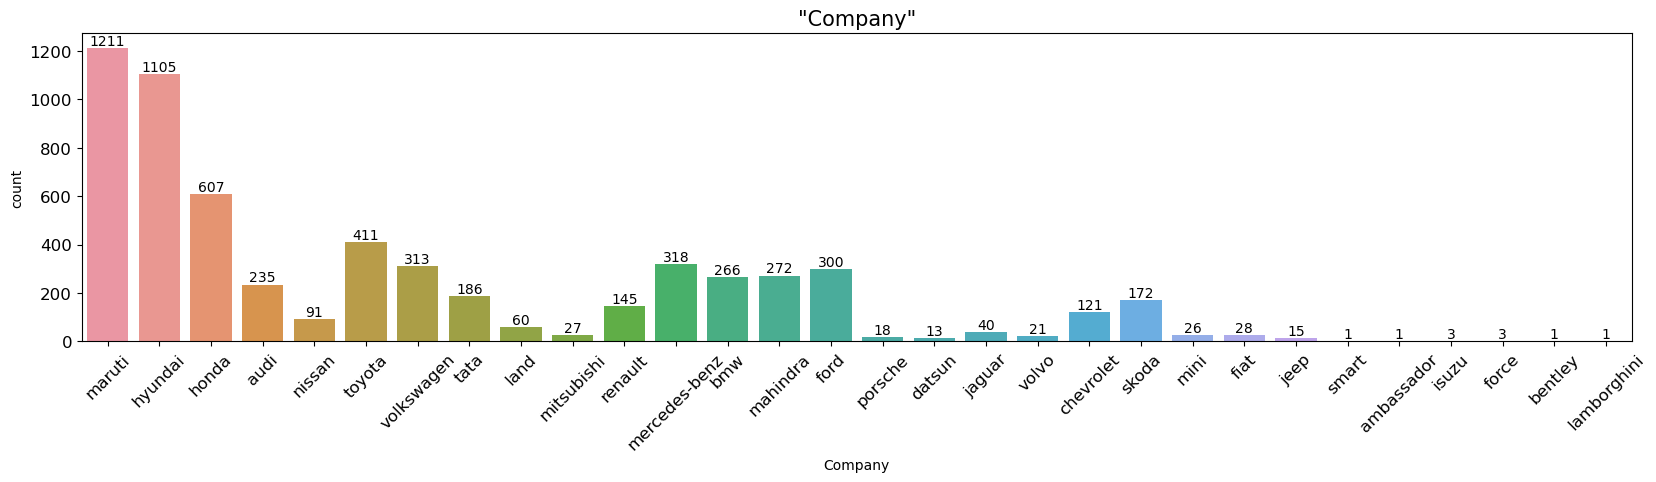

In [29]:
plt.figure(figsize=(20, 4), dpi=100)
graph = sns.countplot(data=df, x='Company')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Company"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)  
plt.show()

*"Model"*

In [30]:
df.Model.value_counts()

Model
maruti swift          353
honda city            269
hyundai i20           246
hyundai verna         170
toyota innova         164
                     ... 
fiat petra              1
volkswagen beetle       1
ambassador classic      1
smart fortwo            1
jaguar f                1
Name: count, Length: 215, dtype: int64

In [31]:
threshold = 10
counts = df['Model'].value_counts()
filtered_models = counts[counts >= threshold].index.tolist()
df = df[df['Model'].isin(filtered_models)]

In [32]:
df.Model.value_counts()

Model
maruti swift              353
honda city                269
hyundai i20               246
hyundai verna             170
toyota innova             164
                         ... 
tata tiago                 11
mercedes-benz gl-class     11
mercedes-benz s            10
chevrolet spark            10
hyundai getz               10
Name: count, Length: 104, dtype: int64

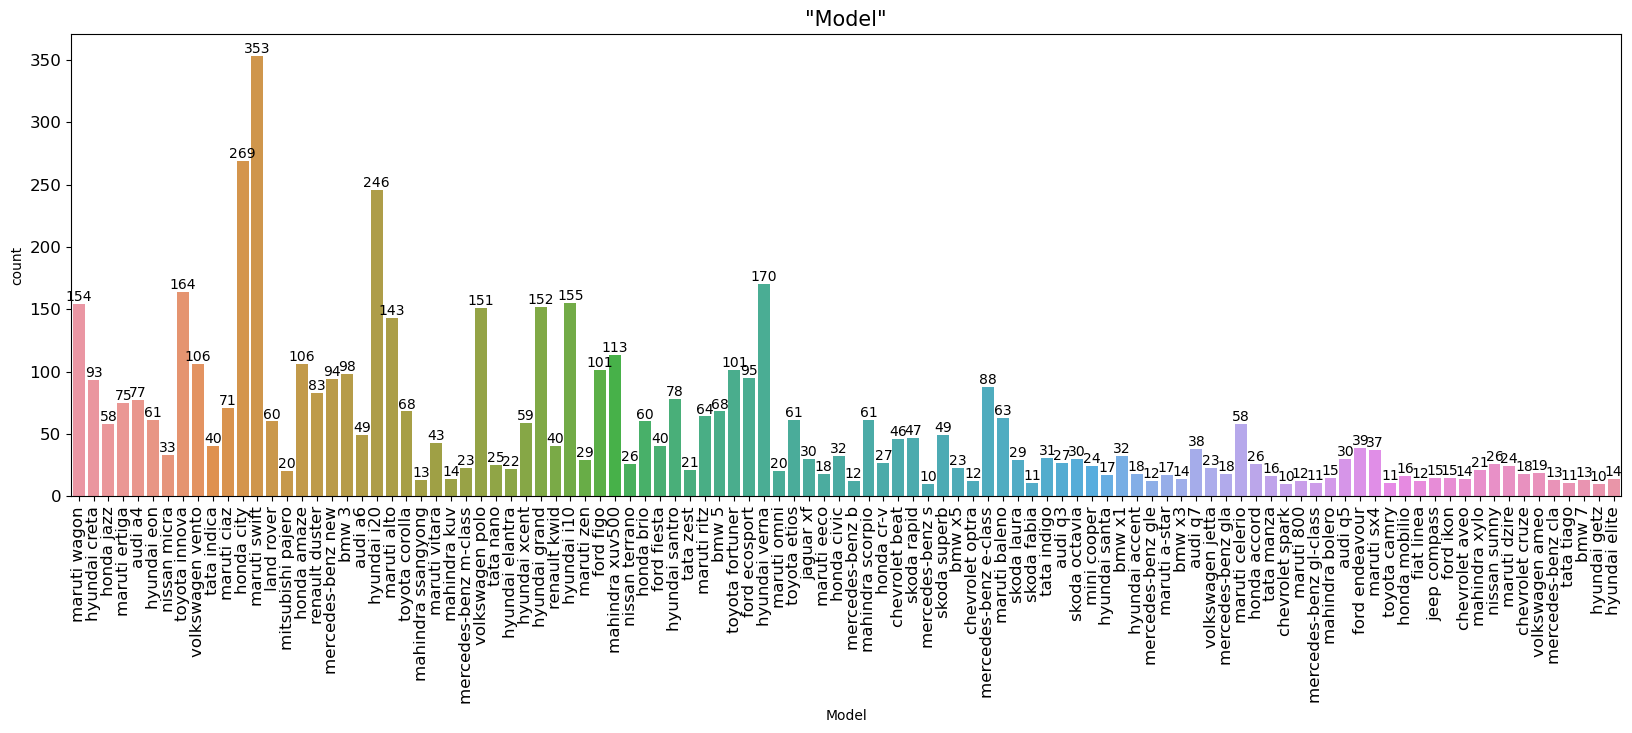

In [33]:
plt.figure(figsize=(20,6), dpi=100)
graph = sns.countplot(data=df, x='Model')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Model"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*"Location"*


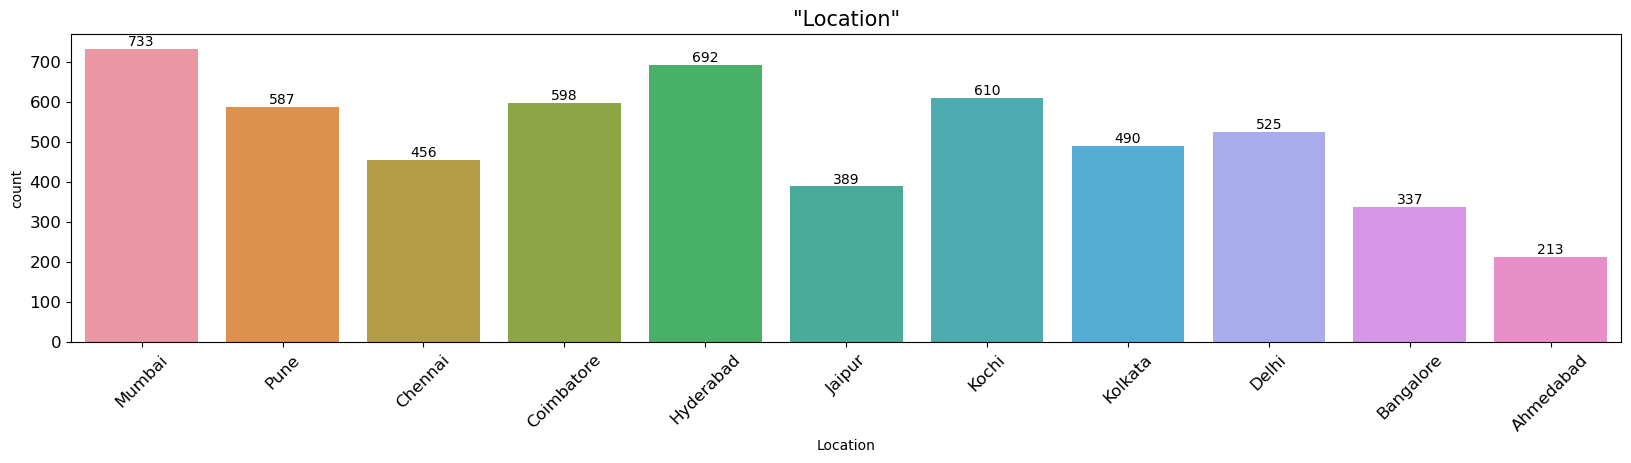

In [34]:
plt.figure(figsize=(20,4), dpi=100)
graph = sns.countplot(data=df, x='Location')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Location"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*"Owner_Type"*


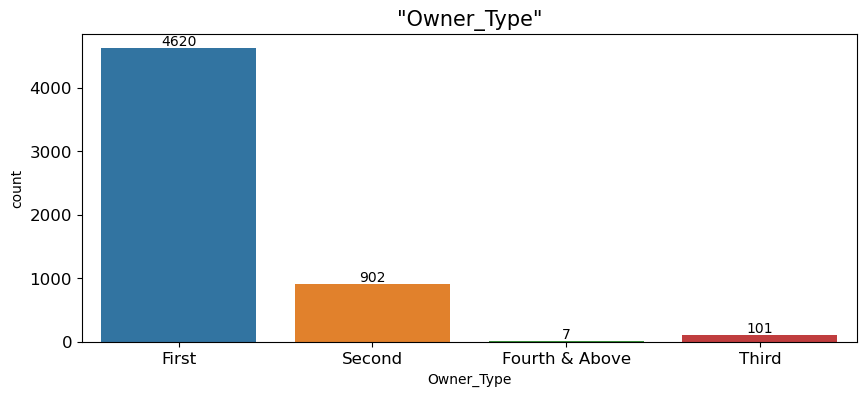

In [35]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Owner_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Owner_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

 *"Fuel_Type"*


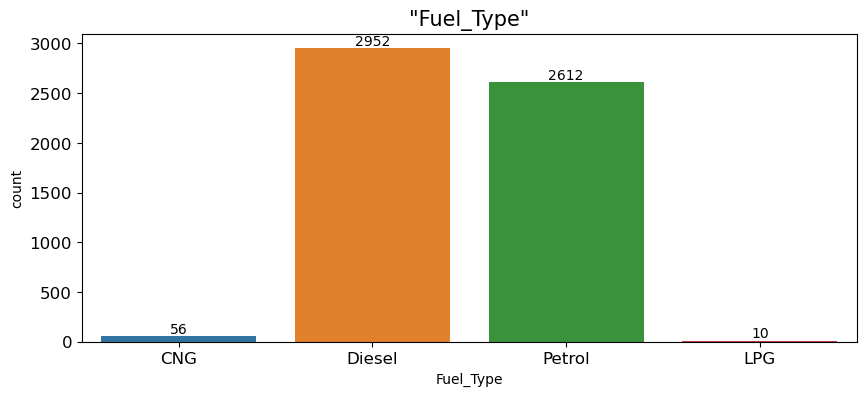

In [36]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Fuel_Type')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Fuel_Type"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

*"Transmission"*


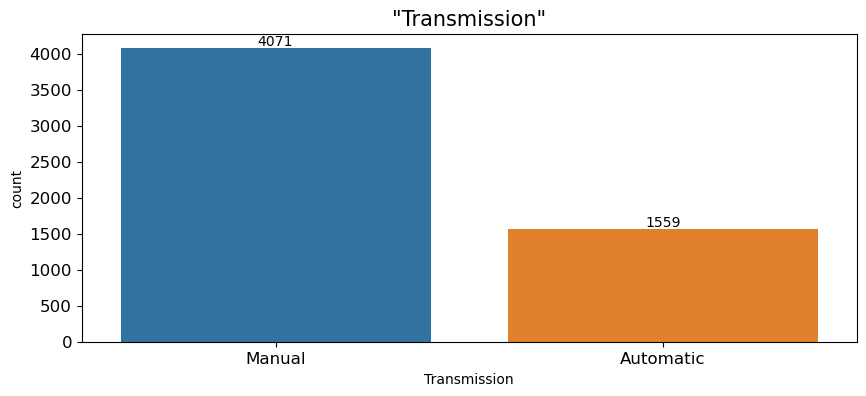

In [37]:
plt.figure(figsize=(10, 4), dpi=100)
graph = sns.countplot(data=df, x='Transmission')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Transmission"', fontsize=15)
for cont in graph.containers:
        graph.bar_label(cont)
plt.show()

Çözüm:
- Maruti markası otomobil üreticisi pazarında en çok görülen markadır.

- Maruti Swift modeli en çok satan araçtır.

- En çok araç satışının yapıldığı şehir Mumbai'dir.

- İlk sahibinden gelen araçlar genellikle piyasada görülür.

- Yakıt türü olarak en yüksek frekansa benzin, en düşük frekansa ise LPG sahiptir.

- Manuel araçlar otomatik araçlara göre daha fazla satılmaktadır.

****************************


**Sayısal Değişkenler için Tek Değişkenli Analiz**

*"Year"*

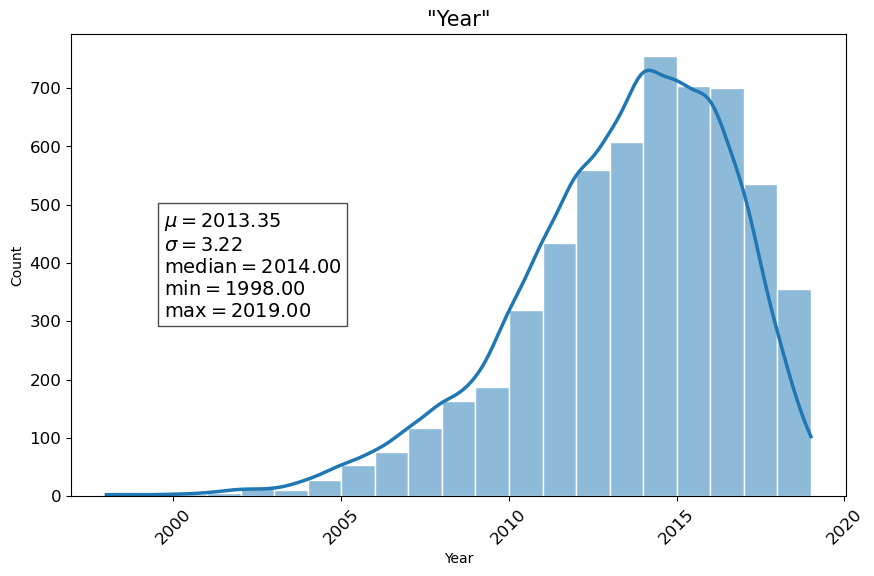

In [38]:
plt.figure(figsize=(10, 6), dpi = 100)
grap = sns.histplot(data=df, x = 'Year' , bins = 21,  # 1998-2019 arası olduğu için
                    kde = True, edgecolor = 'white' , alpha = 0.5, line_kws={'lw':2.5})

plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('"Year"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Year'].mean(),
    r'$\sigma=%.2f$' %df['Year'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Year']),
    r'$\mathrm{min}=%.2f$' %df['Year'].min(),
    r'$\mathrm{max}=%.2f$' %df['Year'].max()

))

plt.text(0.05, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Kilometers_Driven"*


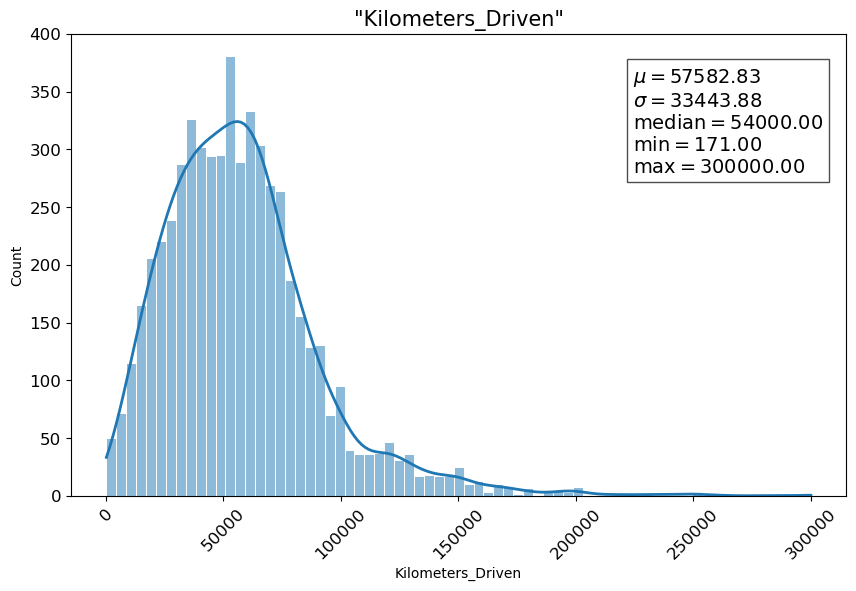

In [39]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Kilometers_Driven', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Kilometers_Driven"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Kilometers_Driven'].mean(),
    r'$\sigma=%.2f$' %df['Kilometers_Driven'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Kilometers_Driven']),
    r'$\mathrm{min}=%.2f$' %df['Kilometers_Driven'].min(),
    r'$\mathrm{max}=%.2f$' %df['Kilometers_Driven'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Mileage"*

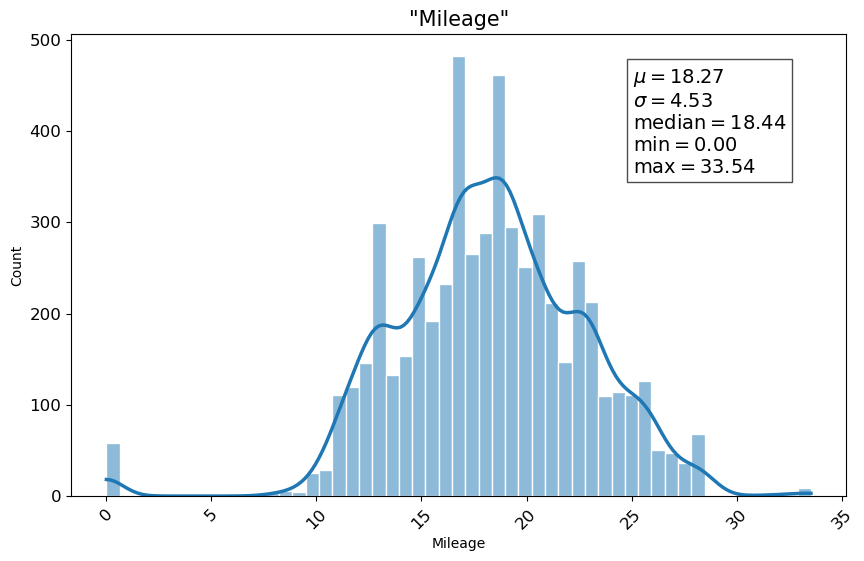

In [40]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Mileage', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Mileage"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Mileage'].mean(),
    r'$\sigma=%.2f$' %df['Mileage'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Mileage']),
    r'$\mathrm{min}=%.2f$' %df['Mileage'].min(),
    r'$\mathrm{max}=%.2f$' %df['Mileage'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Engine"*


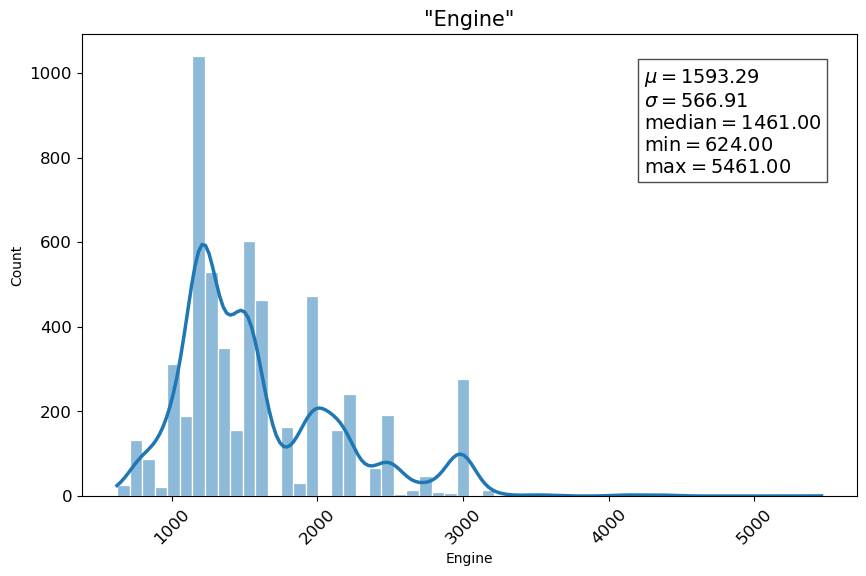

In [41]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Engine', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Engine"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Engine'].mean(),
    r'$\sigma=%.2f$' %df['Engine'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Engine']),
    r'$\mathrm{min}=%.2f$' %df['Engine'].min(),
    r'$\mathrm{max}=%.2f$' %df['Engine'].max()
))

plt.text(0.725, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Power"*

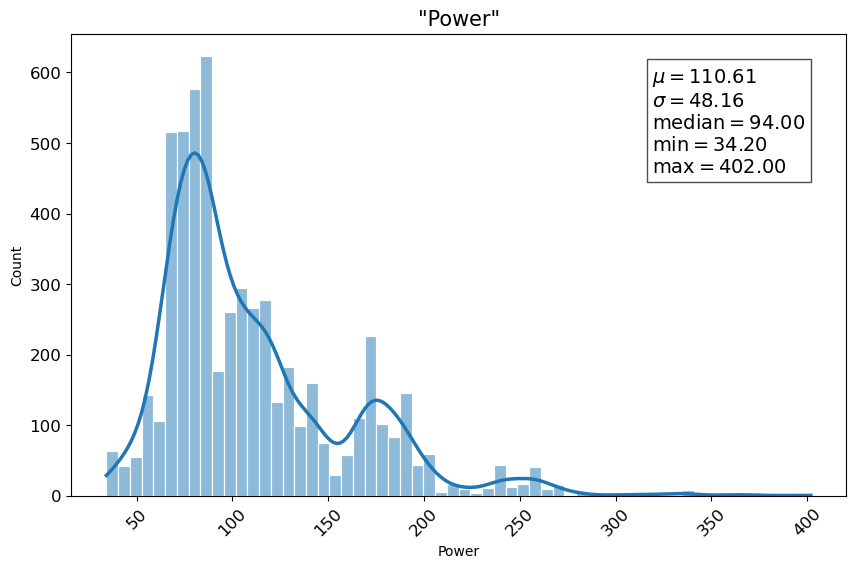

In [42]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Power', kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Power"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Power'].mean(),
    r'$\sigma=%.2f$' %df['Power'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Power']),
    r'$\mathrm{min}=%.2f$' %df['Power'].min(),
    r'$\mathrm{max}=%.2f$' %df['Power'].max()
))

plt.text(0.75, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

*"Seats"*


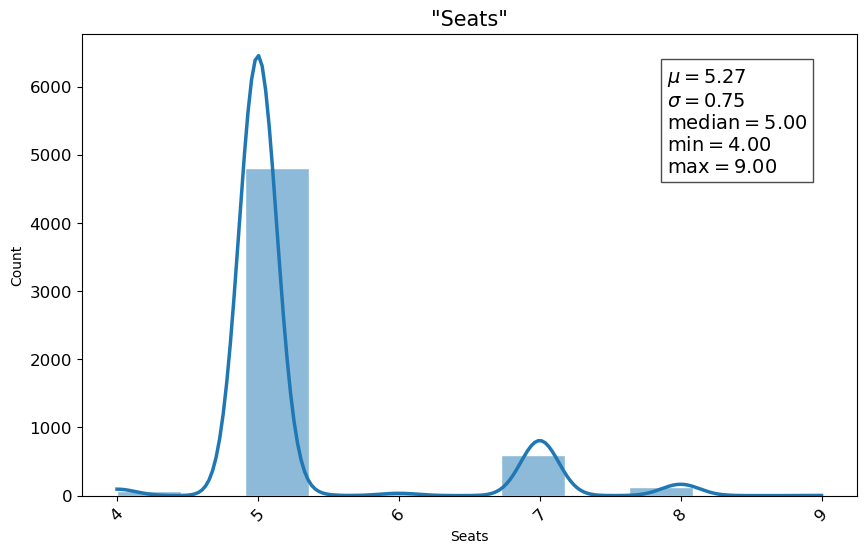

In [43]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Seats', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Seats"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Seats'].mean(),
    r'$\sigma=%.2f$' %df['Seats'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Seats']),
    r'$\mathrm{min}=%.2f$' %df['Seats'].min(),
    r'$\mathrm{max}=%.2f$' %df['Seats'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()


*"Price"*


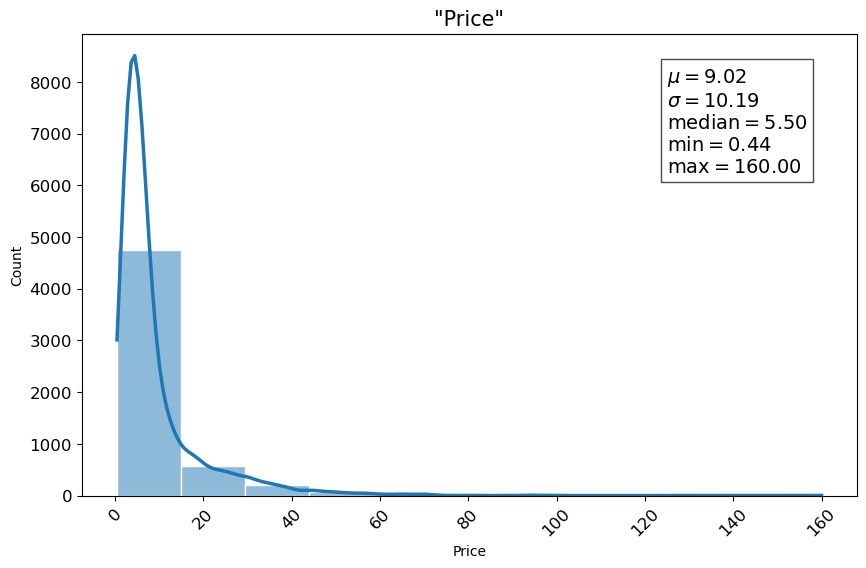

In [44]:
plt.figure(figsize=(10, 6), dpi=100)
graph = sns.histplot(data=df, x='Price', bins=11, kde=True, edgecolor='white', alpha=0.5, line_kws={'lw': 2.5})
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('"Price"', fontsize=15)

textstr = '\n'.join((
    r'$\mu=%.2f$' %df['Price'].mean(),
    r'$\sigma=%.2f$' %df['Price'].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df['Price']),
    r'$\mathrm{min}=%.2f$' %df['Price'].min(),
    r'$\mathrm{max}=%.2f$' %df['Price'].max()
))

plt.text(0.755, 0.7, textstr, transform=graph.transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.7))

plt.show()

************************

**Kategorik Değişkenler için İki Değişkenli Analiz**


*"Price vs Company"*


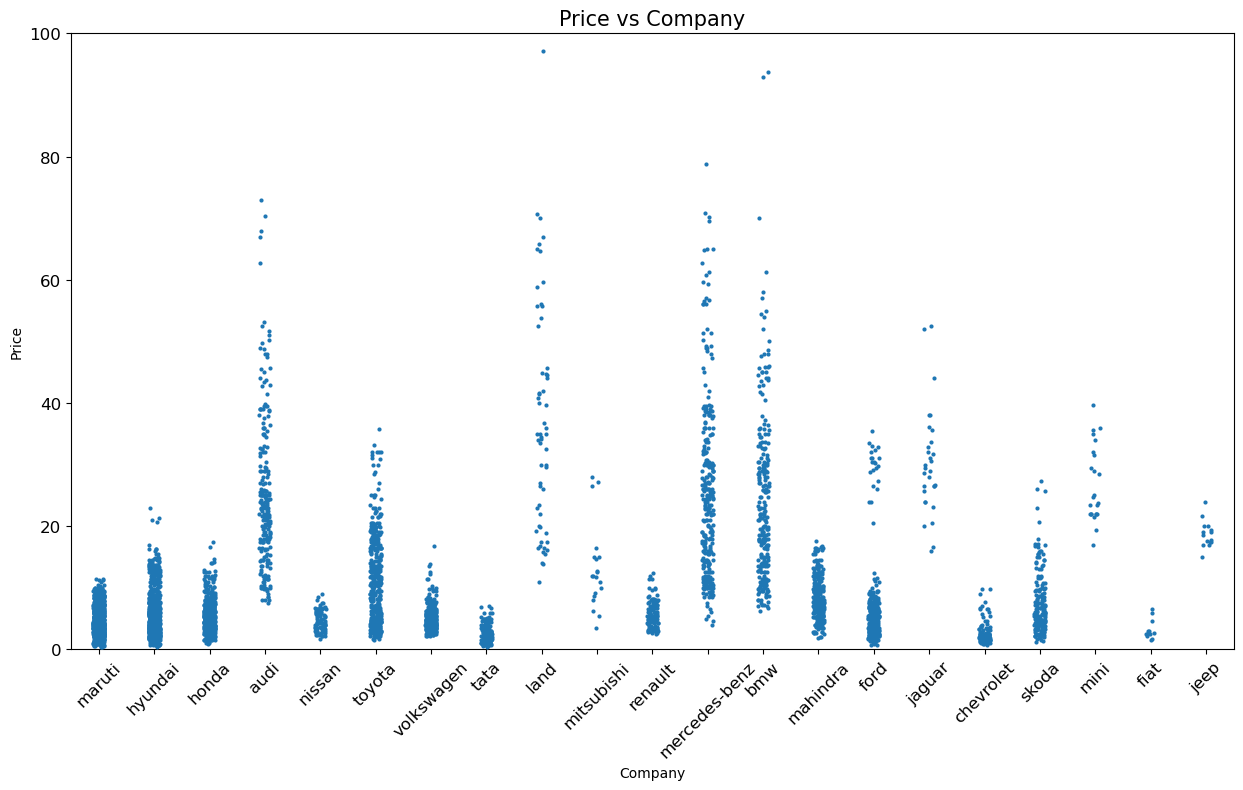

In [45]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Company', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100]) ## Daha iyi görünmesi için y ekseni 100 ile sınırlıdır
plt.title('Price vs Company', size =15)
plt.show()

*"Price vs Location"*

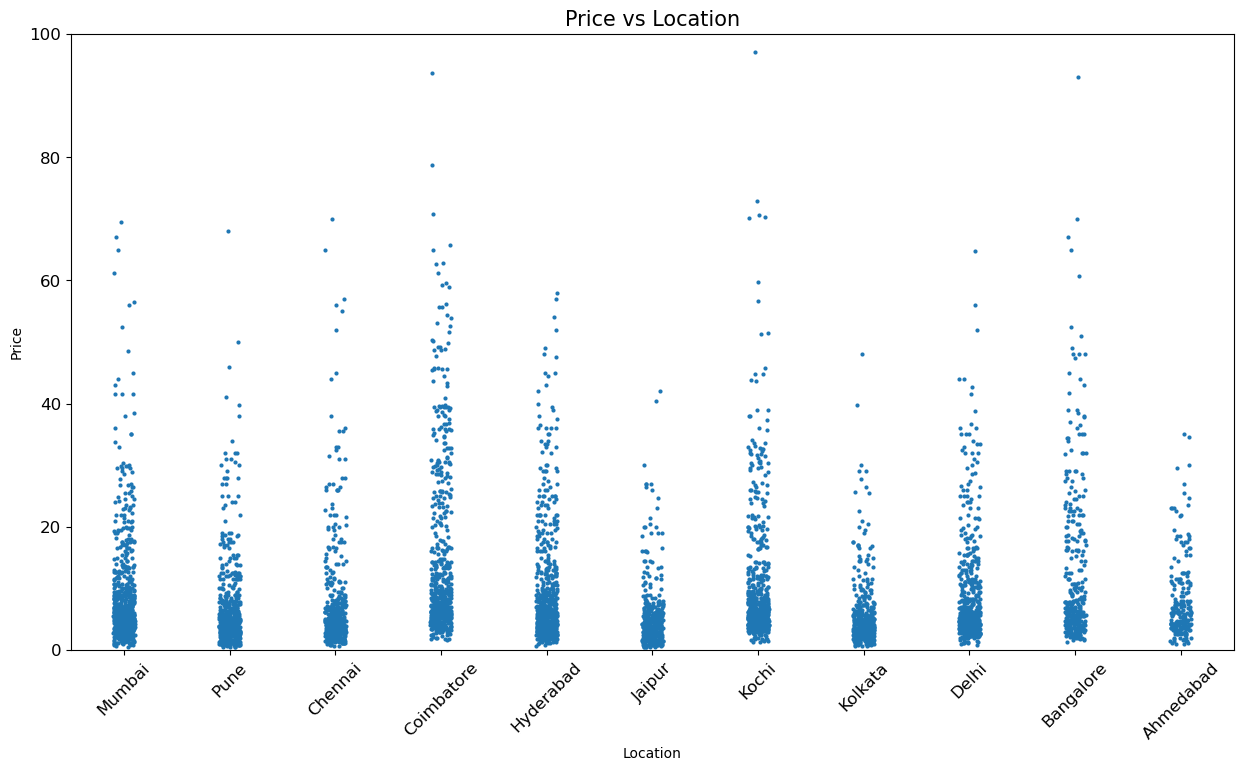

In [46]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Location', y='Price', data=df, size=3)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Location', size=15)
plt.show()

*"Price vs Owner_Type"*

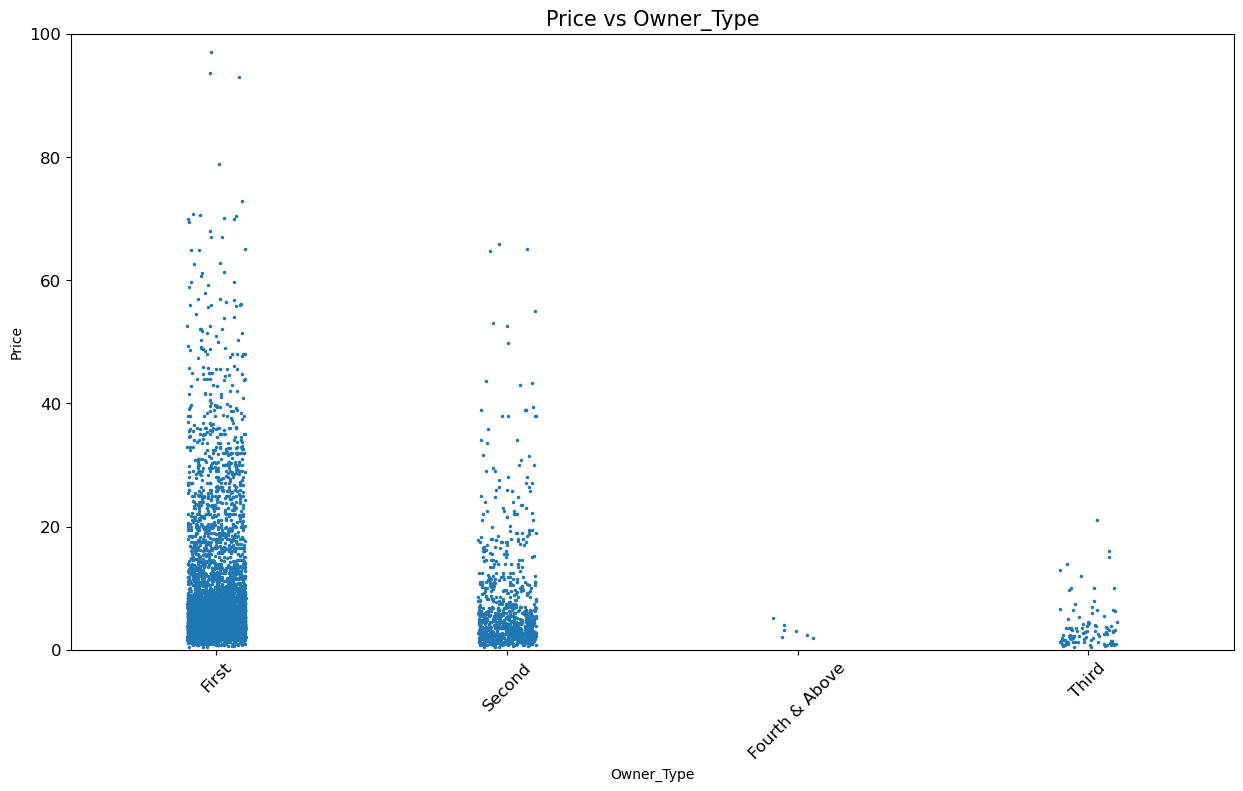

In [47]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Owner_Type', y='Price', data=df, size=2.5)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Owner_Type', size=15)
plt.show()

*"Price vs Fuel_Type"*

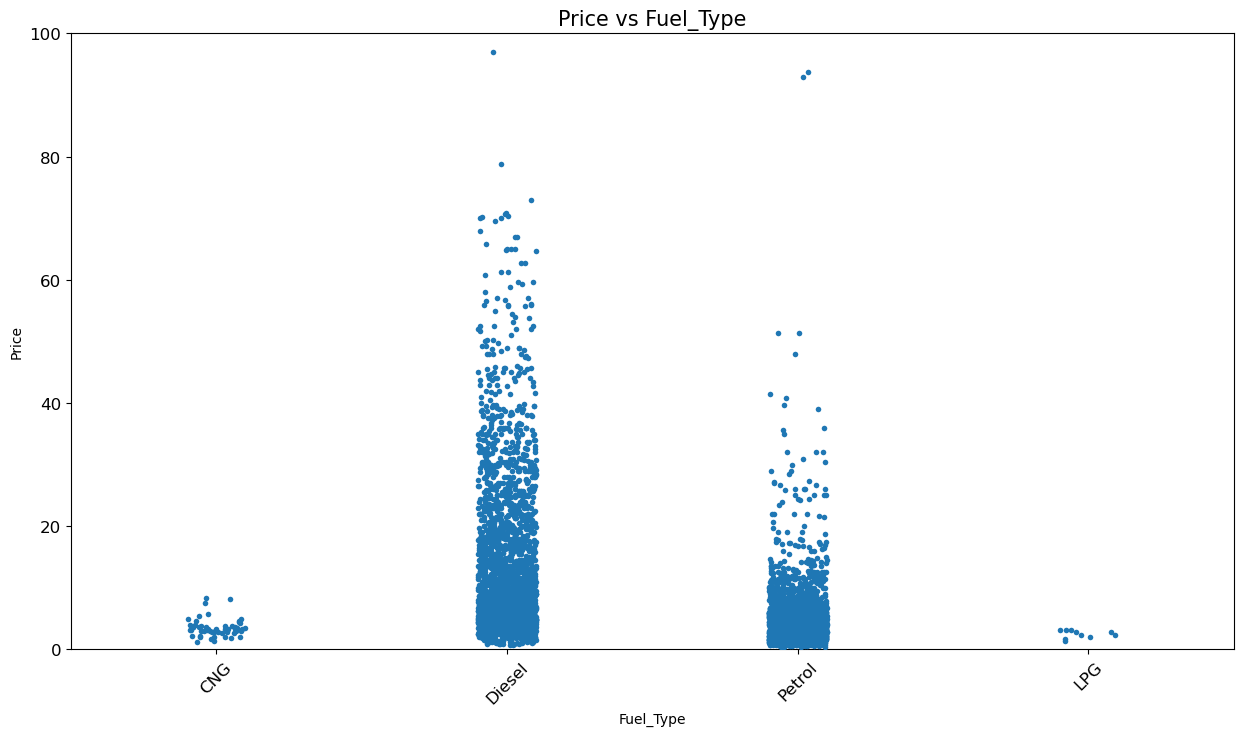

In [48]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Fuel_Type', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Fuel_Type', size=15)
plt.show()


*"Price vs Transmission"*

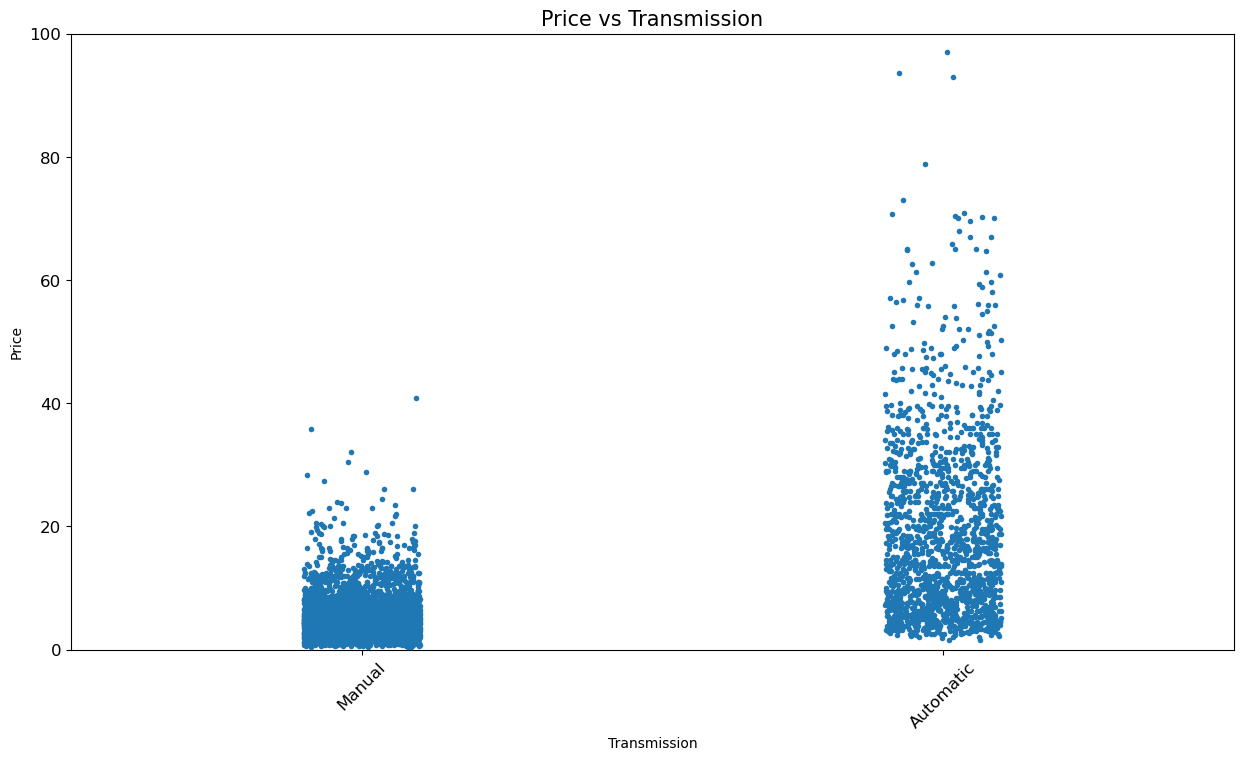

In [49]:
plt.figure(figsize=(15, 8), dpi=100)
sns.stripplot(x='Transmission', y='Price', data=df, size=4)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Transmission', size=15)
plt.show()

Çözüm:
- Satış fiyatı en yüksek olan üretici ise Mini Cooper'dır. En düşük fiyatlı üretici Maruti Suzuki'dir. Bu veri seti Hindistan'dan alındığı için yerli üretici olan Hintli bir markanın bunu herkese satması doğaldır.

- İkinci kullanıcının sattığı araçlar, birinci kullanıcının sattığı araçlara göre daha ucuzdur.

- Benzinli araç fiyatları dizel araçlara göre daha düşüktür.

- Otomatik arabalar manuel araçlara göre daha pahalıdır.

*********************

**Sayısal Değişkenler için İki Değişkenli Analiz**

*"Price vs Year"*

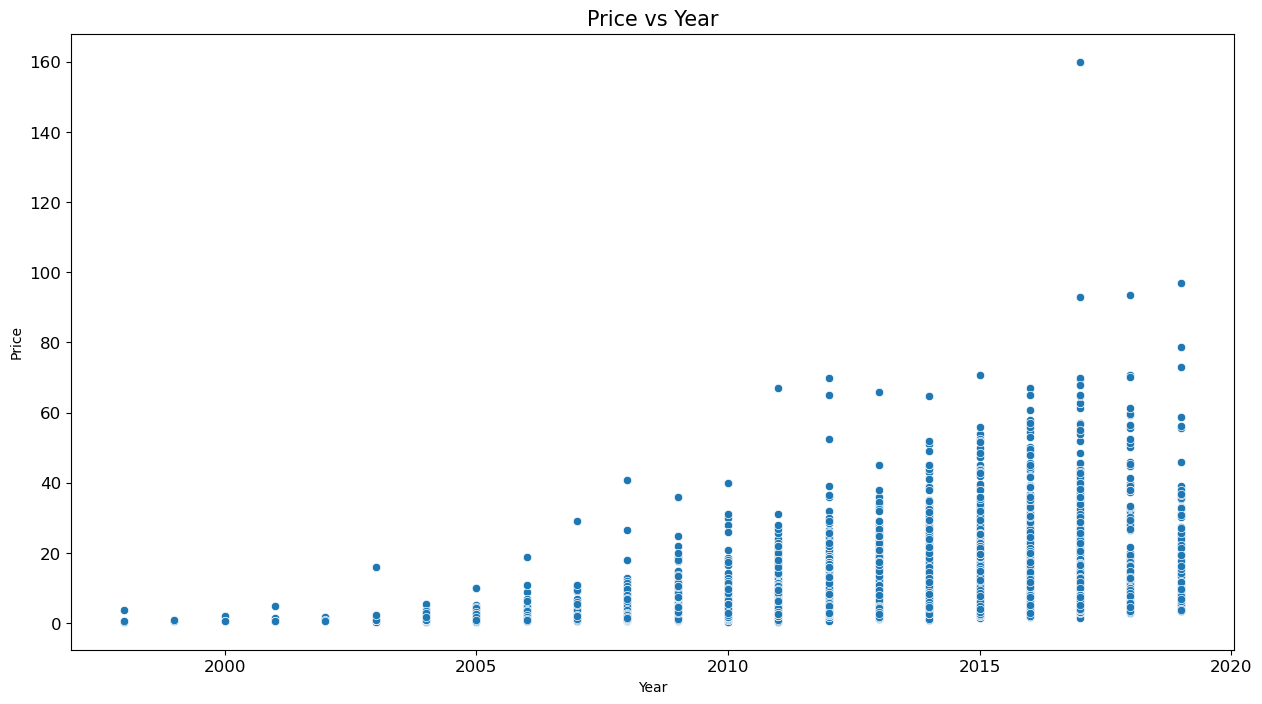

In [50]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Year', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Year', size=15)
plt.show()


*"Price vs Kilometers_Driven"*


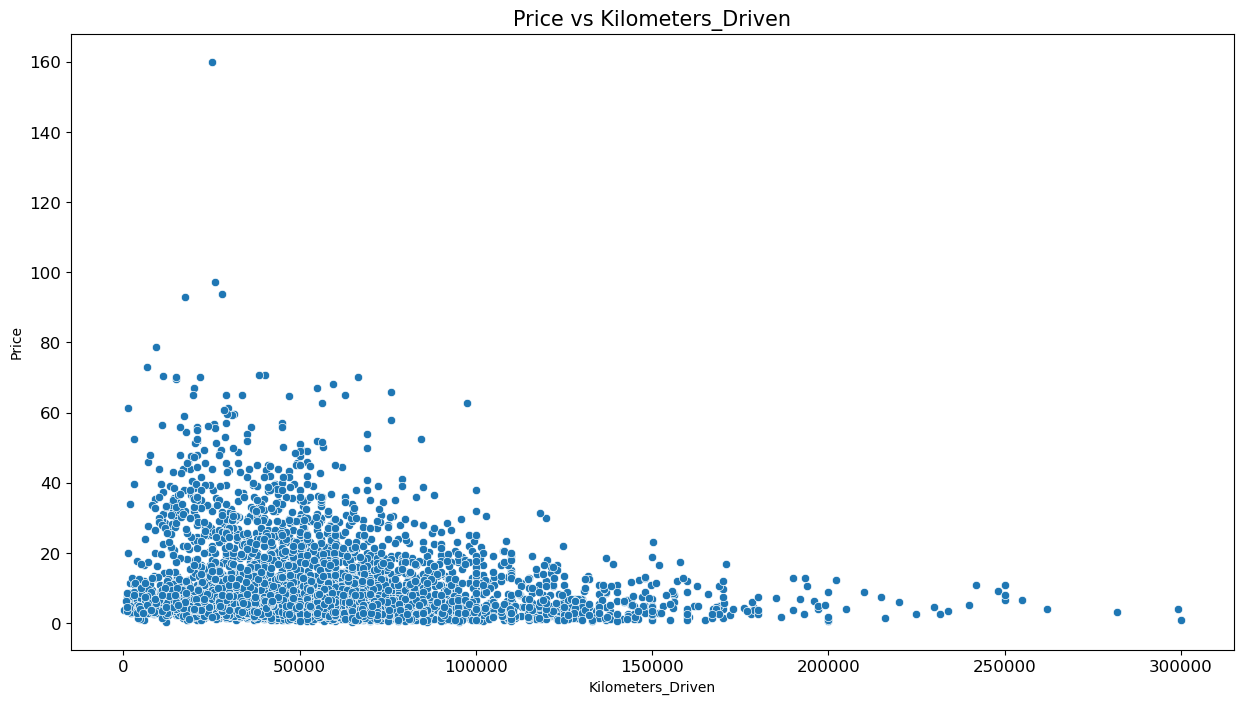

In [51]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Kilometers_Driven', size=15)
plt.show()

*"Price vs Mileage"*

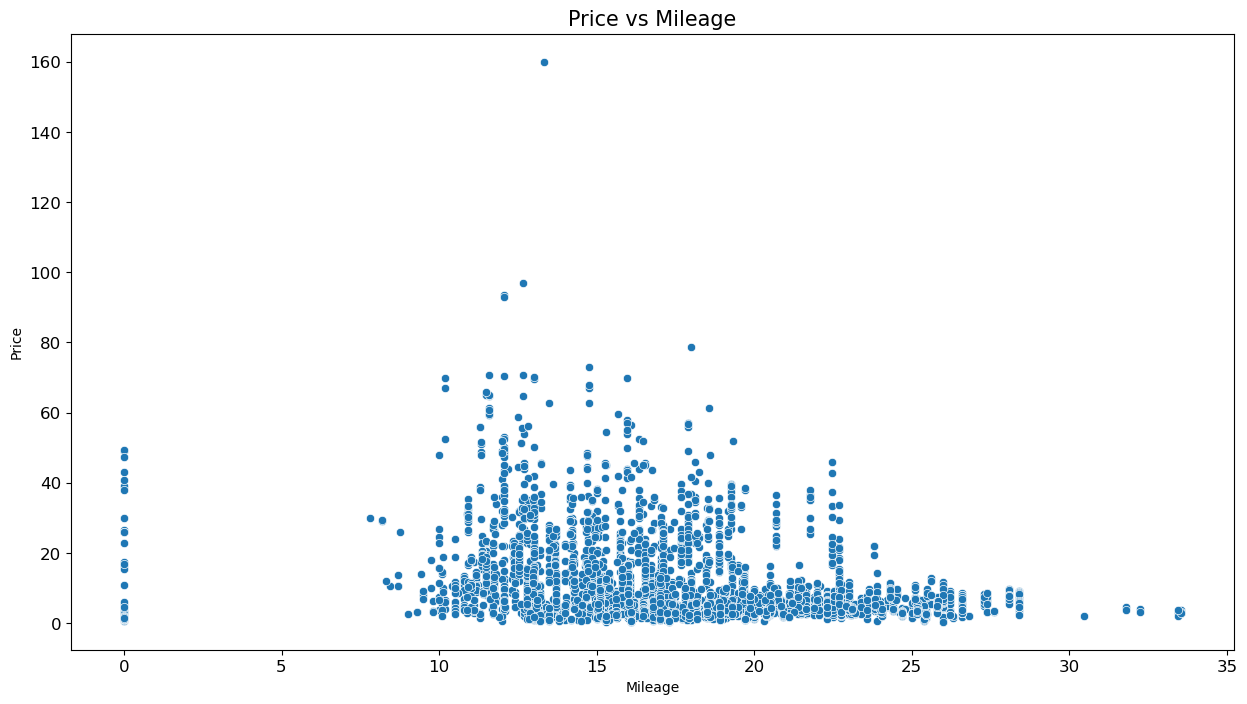

In [52]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Price vs Mileage', size=15)
plt.show()

*"Price vs Engine"*

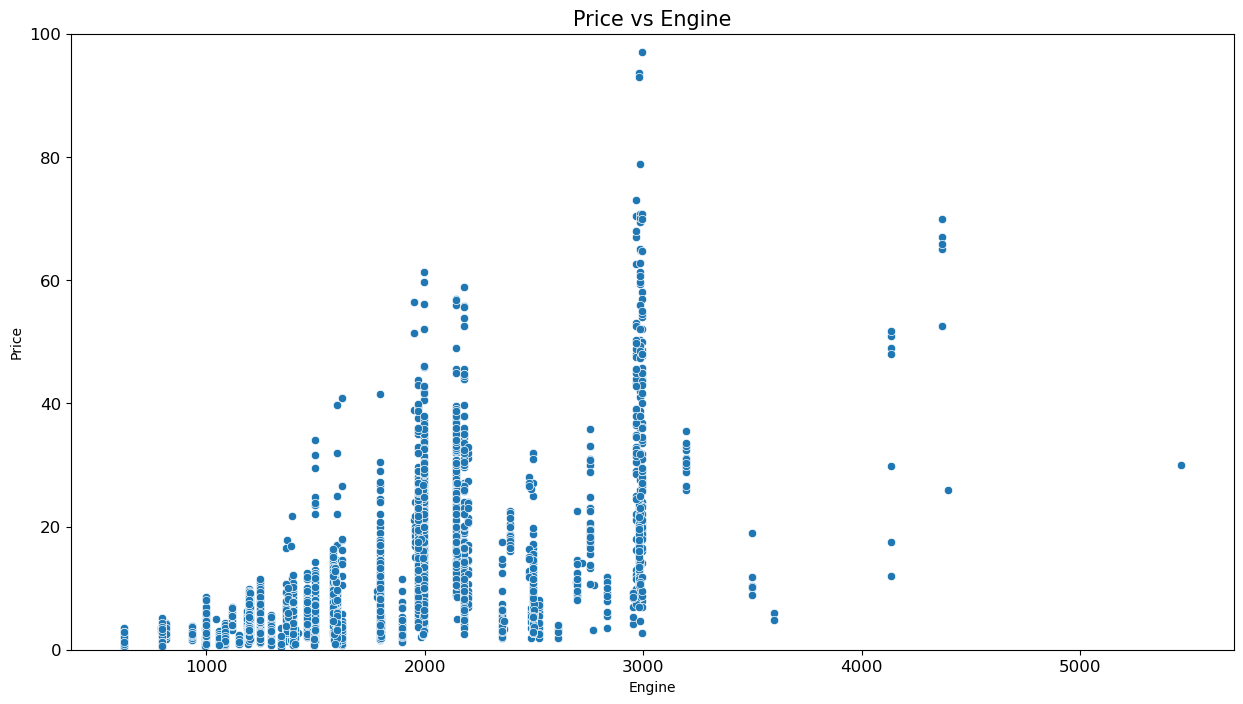

In [53]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Engine', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Engine', size=15)
plt.show()


*"Price vs Power"*


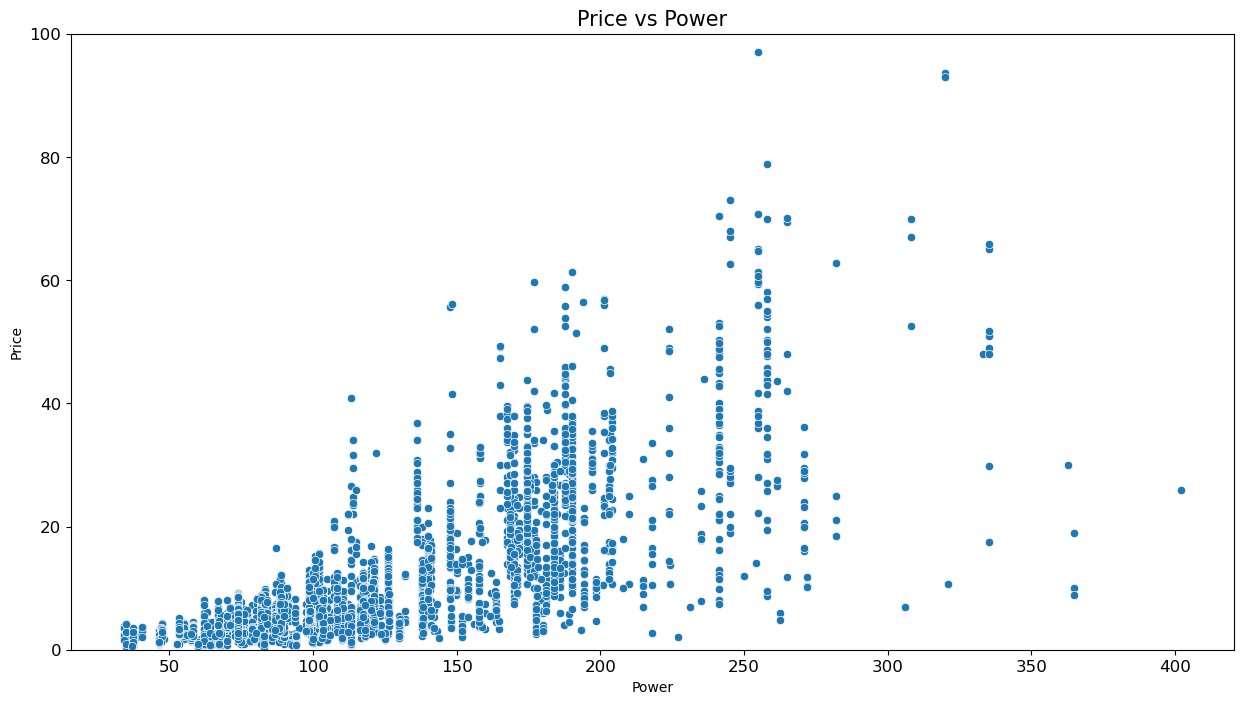

In [54]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Power', y='Price')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Power', size=15)
plt.show()

*"Price vs Seats"*

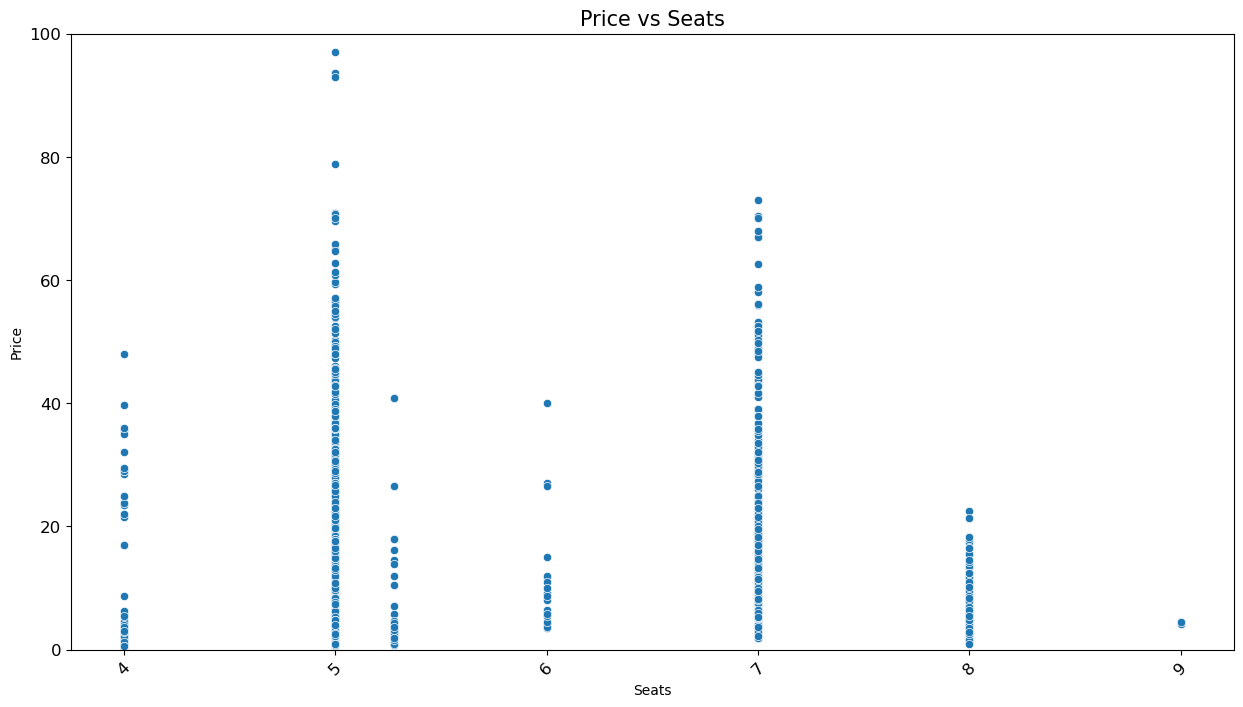

In [55]:
plt.figure(figsize=(15, 8), dpi=100)
sns.scatterplot(data=df, x='Seats', y='Price')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([0,100])
plt.title('Price vs Seats', size=15)
plt.show()

Çözüm:
- Aracın kilometresi arttıkça satış fiyatı düşer.

- Araç yaşlandıkça satış fiyatı düşer.

- Kullanıcı sayısı arttıkça satış fiyatı düşer.

***********************

**Kategorik Değerleri Dönüştürme (Kodlama)**

In [56]:
CatCols = ['Company', 'Model', 'Location', 'Owner_Type', 'Fuel_Type', 'Transmission']

df = pd.get_dummies(df, columns=CatCols, drop_first=True)
df.head(10)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Company_bmw,Company_chevrolet,Company_fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,26.60,998.0,58.16,5.0,1.75,False,False,False,...,False,True,False,False,False,False,False,False,False,True
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,False,False,False,...,False,False,True,False,False,False,True,False,False,True
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,False,False,False,...,False,False,False,False,True,False,True,False,False,False
5,2012,75000,21.10,814.0,55.20,5.0,2.35,False,False,False,...,False,False,False,False,False,False,False,True,False,True
6,2013,86999,23.08,1461.0,63.10,5.0,3.50,False,False,False,...,False,False,False,False,False,False,True,False,False,True
7,2016,36000,11.36,2755.0,171.50,8.0,17.50,False,False,False,...,False,True,False,False,False,False,True,False,False,False
8,2013,64430,20.54,1598.0,103.60,5.0,5.20,False,False,False,...,False,False,True,False,False,False,True,False,False,True
9,2012,65932,22.30,1248.0,74.00,5.0,1.95,False,False,False,...,False,False,False,False,True,False,True,False,False,True


Regresyon modellemesi yapılırken kategorik verilerin sayısal formata dönüştürülmesi sıklıkla tavsiye edilir. Bu dönüşüm, modelin kategorik verileri anlaması ve işlemesi için gereklidir.

*****************

**Korelasyon Matrisi**

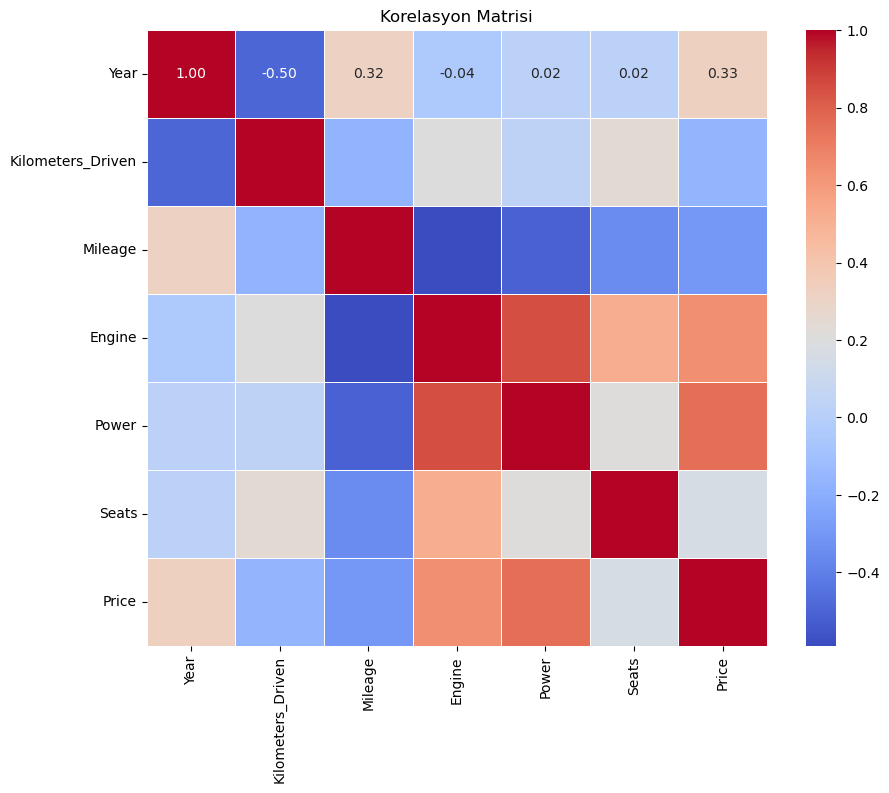

In [65]:
# Sayısal sütunları seçme
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini oluşturma
correlation_matrix = numeric_columns.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

Korelasyon matrisi, veri setindeki farklı özellikler arasındaki ilişkiyi anlamak için kullanılan bir araçtır. Bu matris, her bir özellik çifti arasındaki korelasyon katsayılarını içerir. Korelasyon katsayısı, iki değişken arasındaki ilişkinin gücünü ve yönünü ölçer. 

Korelasyon matrisi yapıldığında, aşağıdaki bilgiler elde edilir:

1. Korelasyon katsayıları: Her bir özellik çifti için korelasyon katsayıları hesaplanır. Bu katsayılar, -1 ile 1 arasında bir değer alır. Pozitif bir korelasyon katsayısı, bir değişkenin artışıyla diğer değişkenin de arttığını gösterirken, negatif bir korelasyon katsayısı ise bir değişkenin artışıyla diğer değişkenin azaldığını gösterir. 0'a yakın bir korelasyon katsayısı ise iki değişken arasında bir ilişki olmadığını gösterir.

2. Korelasyonun gücü: Korelasyon katsayısı, değişkenler arasındaki ilişkinin gücünü gösterir. 1 veya -1'e yakın bir korelasyon katsayısı, değişkenler arasında güçlü bir ilişki olduğunu, 0'a yakın bir korelasyon katsayısı ise zayıf bir ilişki olduğunu gösterir.

Korelasyon matrisi, veri setindeki değişkenler arasındaki ilişkileri belirlemek, çoklu bağlantıları tanımlamak ve hangi değişkenlerin birlikte hareket ettiğini anlamak için önemlidir. Bu bilgiler, makine öğrenimi modellerinin oluşturulması ve veri analizi süreçlerinde faydalıdır. Özellikle, çoklu doğrusal regresyon gibi modellerde, değişkenler arasındaki korelasyonu dikkate almak model performansını etkileyebilir.

*********************

random forest


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

*Özelliklerin ve Hedef Değişkenlerin Belirlenmesi*

In [59]:
X = df.drop('Price', axis=1)
y = df['Price']

*Eğitim-Test-Bölünmesi*

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Veri Seti büyük olduğundan "test_size" değerinin 0,2 seçilmesi modelleme için yeterli olacaktır.

In [61]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (4504, 146)
X_test shape:  (1126, 146)
y_train shape:  (4504,)
y_test shape:  (1126,)


*Model Oluşturma*

In [62]:
Random_Forest_Regressor = RandomForestRegressor()
Random_Forest_Regressor.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
def evaluation(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)
    return mae, mse, rmse, r_squared

Model değerlendirme metrikleri tanımlandı ve model değerlendirme aşamasına geçilebilir.

*Model Değerlendirmesi*

In [64]:
y_pred = Random_Forest_Regressor.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)

train_score = list()
test_score = list()

train_score.append(Random_Forest_Regressor.score(X_train,y_train))
test_score.append(Random_Forest_Regressor.score(X_test,y_test))

MAE: 1.1780388422989088
MSE: 5.332147887979121
RMSE: 2.30914440604721
R2 Score: 0.9458944849913606


Çözüm:
- Model verilerin %94'ünü açıklıyor. Bu sonuçlar, modelin genel olarak iyi performans gösterdiğini ancak bazı noktalarda iyileştirme fırsatları olabileceğini göstermektedir. 